### <center>  **Credit Card Number Detection**</center>

<center><img src="./assets/Gemini_Generated_Image_liaxajliaxajliax.jpg" alt="Gemini Generated Image" width="1200" height="200"/></center>



### **Importing libraries**

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import numpy as np


### **Image Processing Workflow**

In this section, we'll load an image, determine if it has high-frequency content or salt-and-pepper noise, resize it, pad it with the top-left pixel color, and finally detect edges in the image to get the hough lines from it.


### **Used Guide**

* **Py Image Search**  
   [pyimagesearch](https://pyimagesearch.com/2017/07/17/credit-card-ocr-with-opencv-and-python/)

### **References**

1. **OpenCV Documentation - Image Resizing**  
   [OpenCV: Geometric Transformations of Images](https://docs.opencv.org/4.x/da/d6e/tutorial_py_geometric_transformations.html)
   
2. **OpenCV Documentation - Padding and Border Types**  
   [OpenCV: Adding Borders to Images](https://docs.opencv.org/4.x/da/d0c/tutorial_bounding_rects_circles.html)
   
3. **OpenCV Documentation - Edge Detection**  
   [OpenCV: Canny Edge Detection](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html)
   
4. **Image Processing in OpenCV - Smoothing and Blurring**  
   [OpenCV: Image Filtering](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html)
   
5. **Frequency Domain Analysis in Image Processing**  
   Gonzalez, R. C., & Woods, R. E. (2007). *Digital Image Processing (3rd Edition)*. Prentice-Hall, Inc.
   
6. **Morphological Operations in OpenCV**  
   [OpenCV: Morphological Transformations](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html)




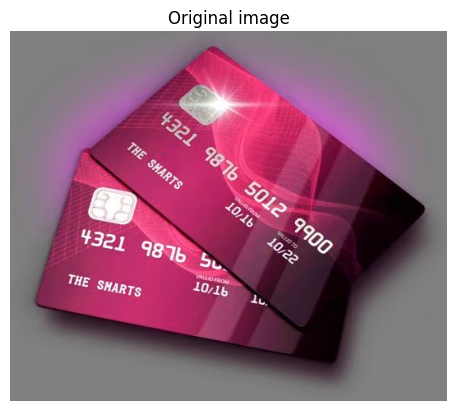

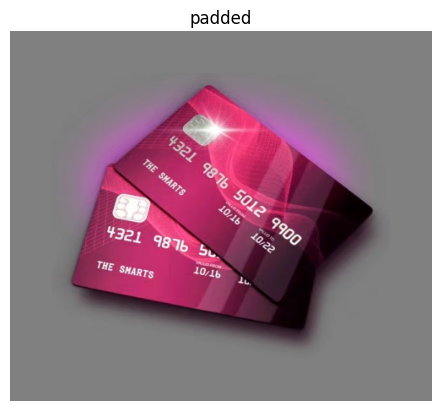

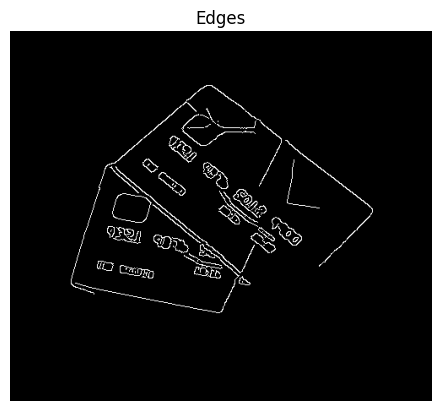

In [47]:


def showImage(name, image, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.title(name)
    plt.show()

def resize_image(img, target_width):

    if img is None:
        print("Error: Image not found or unable to load.")
        return
    
    height, width = img.shape[:2]  
    width_percent = (target_width / float(width))
    new_height = int((float(height) * float(width_percent))) 
    new_img = cv2.resize(img, (target_width, new_height), interpolation=cv2.INTER_AREA)
    
    return new_img


def resize_image_quality(img, target_width):

    if img is None:
        print("Error: Image not found or unable to load.")
        return None
    
    height, width = img.shape[:2]
    width_percent = (target_width / float(width))
    new_height = int((float(height) * float(width_percent)))
    new_img = cv2.resize(img, (target_width, new_height), interpolation=cv2.INTER_LANCZOS4)
    
    return new_img


# image = cv2.imread('01 - Straightforward.jpg')
# image = cv2.imread('02 - You can do it.jpg')
# image = cv2.imread('03 - Should be okay.jpg')
# image = cv2.imread('04 - Still ok, I hope.jpg')
# image = cv2.imread('05 - Looks cool, hope it runs cool too.jpg')
# image = cv2.imread('06 - Hatetlewe7 hatlewe7.jpg')
# image = cv2.imread('08 - Ew3a soba3ak ya3am.jpg')
# image = cv2.imread('09 - El spero spathis we23et 3aaaa.jpg')
# image = cv2.imread('10 - Mal7 w Felfel.jpg')#xxxxxxxxxxxxxxxxxx
# image = cv2.imread('11 - Ya setty ew3i.jpg')
# image = cv2.imread('12 - weewooweewoo.jpg')#xxxxxxxxxxxxxxxxx
# image = cv2.imread('13 - Matozbot el camera ya Kimo.jpg')#blurred
# image = cv2.imread('14 - 2el noor 2ata3.jpg')#xxxxxxxxxxxxxxxxxxx
# image = cv2.imread('15 - Compresso Espresso.jpg')#xxxxxxxxxxxxxxxxxxxxxxxxxxxx
image = cv2.imread('16 - Sheel el kart yastaaaa.jpg')
# image = cv2.imread('07 - Hatet3eweg hat3eweg.jpg')


def is_high_frequency(image):

    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    variance = laplacian.var()

    return 9000>variance > 2500


def hasSaltAndPepper(image):

    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    variance = laplacian.var()
    return 9000<variance




if is_high_frequency(image):
    print("Image is high frequency")
    # image,_=pattern_fix_inFreqDomain(image)
    

elif hasSaltAndPepper(image):
    print("Image has salt and pepper noise")
    # image = removesaltAndPepper(image)
    

showImage("Original image",image)


image=resize_image(image,400)

#higher image quality
imagehq=resize_image_quality(image,400)

# Get the top-left pixel value
top_left_pixel = image[0, 0]

# Convert the top-left pixel to a tuple of integers
if len(image.shape) == 2:  # Grayscale image
    top_left_pixel = int(top_left_pixel)
else:  # BGR image
    top_left_pixel = tuple(map(int, top_left_pixel))
# Define the padding size
pad_size = 50 
padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, 
                                  cv2.BORDER_CONSTANT, value=top_left_pixel)

padded_imagehq = cv2.copyMakeBorder(imagehq, pad_size, pad_size, pad_size, pad_size, 
                                  cv2.BORDER_CONSTANT, value=top_left_pixel)
showImage("padded",padded_image)

if len(padded_image.shape)==3:
    gray = cv2.cvtColor(padded_image, cv2.COLOR_BGR2GRAY)
else:
    gray = padded_image


# Preprocess the image
blurred = cv2.GaussianBlur(gray, (9, 9), 0)
blurred = cv2.convertScaleAbs(blurred)
edges = cv2.Canny(blurred, 10, 110)
showImage("Edges", edges, cmap='gray')




### **Notebook Section Description**

In this section, we explore advanced line detection and contour processing techniques using the Hough Line Transform and Convex Hull operations in OpenCV. The process involves:

1. **Hough Line Transform for Line Detection:**
   - We define key parameters such as distance resolution (`rho`), angular resolution (`theta`), threshold, minimum line length, and maximum line gap.
   - Using `cv2.HoughLinesP`, we detect line segments from the edge-detected image.
   - We calculate and sort the lengths of these lines to focus on the most prominent ones, filtering out shorter, less significant lines.
   - The selected lines are drawn on a blank image to visualize the detection process.

2. **Fallback Mechanism for Contour Processing:**
   - If no lines are detected, we proceed with a convex hull-based approach.
   - The image is converted to grayscale and processed to detect edges using the Canny edge detector.
   - Contours are identified, and the Convex Hull of all detected contours is computed.
   - We approximate the polygonal curves of the hull and create a mask to isolate the object.
   - Finally, the contours are dilated and drawn back onto the original padded image for visualization.

This process provides robust handling of image features, ensuring that even in the absence of clear line segments, the significant shapes and contours within the image are effectively highlighted and processed.

### **References**

1. **OpenCV Documentation - Hough Line Transform**  
   [OpenCV: Hough Line Transform](https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html)

2. **OpenCV Documentation - Contours in OpenCV**  
   [OpenCV: Contours in OpenCV](https://docs.opencv.org/4.x/df/d0d/tutorial_find_contours.html)

3. **OpenCV Documentation - Convex Hull**  
   [OpenCV: Convex Hull](https://docs.opencv.org/4.x/d7/d1d/tutorial_hull.html)

4. **OpenCV Documentation - Image Thresholding and Edge Detection**  
   [OpenCV: Image Thresholding](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)

5. **OpenCV Documentation - Drawing Functions in OpenCV**  
   [OpenCV: Drawing Functions in OpenCV](https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html)


[((83, 300), (229, 330)), ((123, 156), (227, 67)), ((126, 163), (228, 248)), ((75, 282), (113, 160)), ((351, 149), (426, 207)), ((158, 196), (224, 250)), ((366, 278), (426, 219)), ((239, 64), (290, 103))]


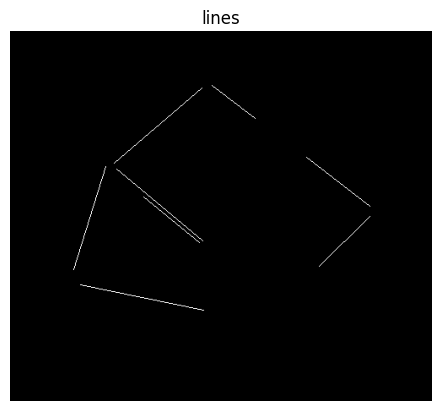

In [48]:

# Define parameters for Hough Line Transform
rho = 1# Distance resolution in pixels of the Hough grid
theta = np.pi / 186  # Angular resolution in radians of the Hough grid
threshold = 20  # Minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # Minimum number of pixels making up a line
max_line_gap = 3  # Maximum gap in pixels between connectable line segments


line_image = np.copy(edges) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

if lines is not None and len(lines)>=4:
    # Function to calculate line length
    def line_length(line):
        x1, y1, x2, y2 = line
        return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

    # Calculate lengths of all lines
    line_lengths = [(line, line_length(line[0])) for line in lines]

    # Sort lines based on their lengths (longest first)
    line_lengths.sort(key=lambda x: x[1], reverse=True)

    # Select the first 4 lines
    top_lines = [line for line, length in line_lengths[:4]]

    # Calculate the length of the 4th longest line to compare against
    length_threshold = line_lengths[3][1] * 0.5  # Example threshold: 50% of the 4th longest line

    # Filter out lines that are significantly shorter than the 4th longest line
    filtered_lines = [line for line, length in line_lengths if length >= length_threshold]

    # Convert lines to the desired format
    formatted_lines = [((line[0][0], line[0][1]), (line[0][2], line[0][3])) for line in filtered_lines]

    print(formatted_lines)

    # Draw the filtered lines on the blank image
    for line in formatted_lines:
        (x1, y1), (x2, y2) = line  # Unpack line correctly
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 1)

    # Draw the lines on the  image
    lines_edges = cv2.addWeighted(edges, 0.8, line_image, 1, 0)
    showImage("lines", line_image, cmap='gray')

else:
    print("No lines detected")
    if len(padded_image.shape)==3:

        gray = cv2.cvtColor(padded_image, cv2.COLOR_BGR2GRAY)

    else:
        gray = padded_image
        
    showImage("gray", gray, cmap="gray")
    gray = cv2.convertScaleAbs(gray)
    edges = cv2.Canny(gray, 50, 150)
    showImage("edges", edges, cmap="gray")
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    all_contours = np.vstack(contours)
    hull = cv2.convexHull(all_contours)
    epsilon = 0.1 * cv2.arcLength(hull, True)
    approx = cv2.approxPolyDP(hull, epsilon, True)
    mask = np.zeros_like(gray)
    cv2.drawContours(mask, [approx], -1, 255, thickness=cv2.FILLED)
    dilated_mask = cv2.dilate(mask, np.ones((10, 10), np.uint8), iterations=1)
    paddedcopy=padded_image.copy()
    dilated_contours, _ = cv2.findContours(dilated_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for contour in dilated_contours:
        cv2.drawContours(paddedcopy, [contour], -1, (0, 255, 0), 2) 
    showImage('Dilated Convex Hull', paddedcopy)


### **Line Extension and Visualization**

In this section, we further enhance the detected lines by extending them to the borders of the image to detect the formed rectangle from them. The steps include:

1. **Extending Detected Lines:**
   - **Function: `extend_line(x1, y1, x2, y2, img_shape)`**
     - This function extends a line segment to the borders of the image based on its slope and intercept.
     - It calculates the endpoints of the extended line, ensuring it intersects with the image's borders.
   - The function checks if the detected lines can be extended and, if possible, calculates the new endpoints.

2. **Visualizing Extended Lines:**
   - A new image is created to draw the extended lines.
   - For each line, if valid endpoints are found, the extended line is drawn on the new image.
   - The extended lines are then blended with the original edge-detected image for visualization.

3. **Drawing Lines on a Black Image:**
   - **Function: `draw_lines_on_black_image(lines, img_shape, color=(0, 255, 0), thickness=2)`**
     - This utility function creates a black image and draws the extended lines on it with the specified color and thickness.
     - This helps in isolating and clearly viewing the extended lines.

The output of this process is a visualization where the detected lines are extended to the borders of the image, providing a more comprehensive view of the linear structures within the image.

### **References**

1. **OpenCV Documentation - Line Drawing**  
   [OpenCV: Drawing Functions in OpenCV](https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html)


Extended lines: [((0, 282), (500, 385)), ((305, 0), (0, 261)), ((456, 438), (0, 58)), ((162, 0), (26, 438)), ((158, 0), (500, 264)), ((453, 438), (0, 66)), ((203, 438), (500, 146)), ((155, 0), (500, 263))]


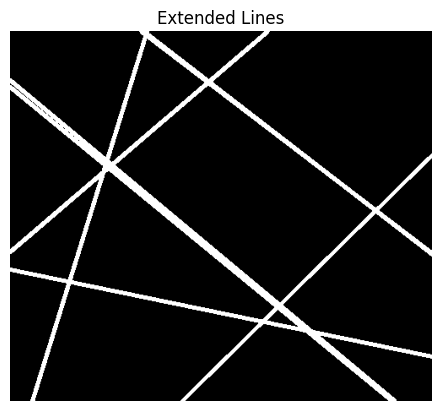

In [49]:

if lines is not None and len(lines)>=4:

    def extend_line(x1, y1, x2, y2, img_shape):

        height, width = img_shape[:2]
        dx = x2 - x1
        dy = y2 - y1

        if dx == 0:
            return [(x1, 0), (x1, height)]
        
        slope = dy / dx
        intercept = y1 - slope * x1

        def get_line_endpoints():
            endpoints = []
            x_top = (0 - intercept) / slope
            if 0 <= x_top < width:
                endpoints.append((int(x_top), 0))

            x_bottom = (height - intercept) / slope
            if 0 <= x_bottom < width:
                endpoints.append((int(x_bottom), height))

            y_left = intercept
            if 0 <= y_left < height:
                endpoints.append((0, int(y_left)))

            y_right = slope * width + intercept
            if 0 <= y_right < height:
                endpoints.append((width, int(y_right)))

            return endpoints

        endpoints = get_line_endpoints()
        if len(endpoints) == 2:
            return endpoints
        else:
            return []

    # Create a new image for the extended lines
    extended_line_image = np.copy(edges) * 0
    extended_lines = []

    # Extend each detected line segment to the image borders
    for line in formatted_lines:
        (x1, y1), (x2, y2) = line  # Correct unpacking for the format
        extended_points = extend_line(x1, y1, x2, y2, edges.shape)
        if len(extended_points) == 2:
            (x1_new, y1_new), (x2_new, y2_new) = extended_points
            extended_lines.append(((x1_new, y1_new), (x2_new, y2_new)))
            cv2.line(extended_line_image, (x1_new, y1_new), (x2_new, y2_new), (255, 0, 0), 3)

    print("Extended lines:", extended_lines)
    lines_edges = cv2.addWeighted(edges, 0.8, extended_line_image, 1, 0)
    showImage("Extended Lines", extended_line_image, cmap='gray')

    def draw_lines_on_black_image(lines, img_shape, color=(0, 255, 0), thickness=2):

        # Create a black image
        black_image = np.zeros((img_shape[0], img_shape[1], 3), dtype=np.uint8)
        
        # Draw each line on the black image
        for (x1, y1), (x2, y2) in lines:
            cv2.line(black_image, (x1, y1), (x2, y2), color, thickness)
        
        return black_image
else:
    print("No lines detected.")


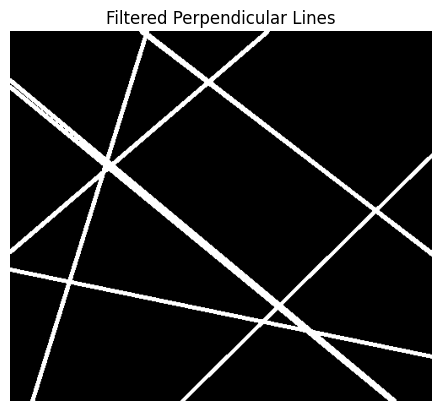

In [50]:
if lines is not None and len(lines)>=4:

    def calculate_angle(line1, line2):

        (x1, y1), (x2, y2) = line1
        (x3, y3), (x4, y4) = line2
        
        # Calculate the slopes
        slope1 = np.arctan2((y2 - y1), (x2 - x1))
        slope2 = np.arctan2((y4 - y3), (x4 - x3))
        
        # Calculate the angle in radians and convert to degrees
        angle = np.abs(np.degrees(slope1 - slope2))
        
        # Normalize the angle to the range [0, 180]
        if angle > 180:
            angle = 360 - angle
        
        return angle

    def is_perpendicular(line1, line2, tolerance=10):

        angle = calculate_angle(line1, line2)
        return 90 - tolerance <= angle <= 90 + tolerance

    def filter_perpendicular_lines(lines, tolerance=10):

        perpendicular_lines = []
        for i in range(len(lines)):
            for j in range(i + 1, len(lines)):
                if is_perpendicular(lines[i], lines[j], tolerance):
                    perpendicular_lines.append(lines[i])
                    perpendicular_lines.append(lines[j])
        
        # Remove duplicates
        perpendicular_lines = list(set(perpendicular_lines))
        return perpendicular_lines

    # Filter lines for perpendicularity
    filtered_lines = filter_perpendicular_lines(extended_lines, tolerance=21)

    # Draw filtered lines on a black background
    filtered_line_image = draw_lines_on_black_image(filtered_lines, edges.shape,(255, 255, 255), 3)
    showImage("Filtered Perpendicular Lines", filtered_line_image)

else:
    print("No lines detected")



### Image Preprocessing and Perspective Transformation for Contour Analysis

In this section, we preprocess the image, identify the largest contour, and perform perspective transformation based on the approximated shape.

**Functions:**

* **prepare_image_for_contours(image):**
  * Converts a color image (BGR) to grayscale if necessary ([Ref 1]).
  * Ensures the image data type is `np.uint8` for compatibility with OpenCV functions ([Ref 2]).

* **find_contours(image):**
  * Utilizes OpenCV's `cv2.findContours` function to identify contours in the image ([Ref 3]).
  * Sorts the contours based on their area and returns the largest one ([Ref 3]).
  * If no contours are found, a message is printed.

* **draw_contours_on_image(contour, image):**
  * Creates a copy of the original image.
  * Draws the identified contour on the copied image using `cv2.drawContours` with a green color ([Ref 3]).
  * Returns the image with the drawn contour.

* **crop_contour_from_image(image, contour):**
  * Creates a mask filled with zeros, the same size as the image's first two dimensions.
  * Uses `cv2.drawContours` to fill the mask with the identified contour in white ([Ref 3]).
  * Performs a bitwise AND operation on the original image and the mask to extract the region containing the contour.
  * Retrieves the bounding rectangle of the contour using `cv2.boundingRect` ([Ref 3]).
  * Crops the original image based on the bounding rectangle coordinates to isolate the contour region.
  * Returns the cropped contour image and its bounding rectangle coordinates as a tuple.

* **approximate_and_draw_contour(cropped_image, contour, rect):**
  * Calculates an epsilon value based on the contour's arc length ([Ref 4]).
  * Uses `cv2.approxPolyDP` to approximate the contour shape with a polygonal curve ([Ref 4]).
  * Adjusts the approximated points based on the cropping rectangle coordinates.
  * Creates a copy of the cropped image.
  * Draws the approximated contour on the copied image using a red color.
  * Draws circles at each point of the approximated contour using a blue color.
  * Returns the image with the drawn approximated contour and the approximated points as a NumPy array.

* **perspective_transform(image, points, dst_size=(300, 200)):**
  * Checks if there are four points provided.
  * Orders the points to ensure they represent the top-left, top-right, bottom-right, and bottom-left corners of the approximated contour using a custom `order_points` function (defined later).
  * Defines destination points for the transformed image with the desired size.
  * Computes the perspective transform matrix using `cv2.getPerspectiveTransform` ([Ref 5]).
  * Applies the perspective transform to the image using `cv2.warpPerspective` ([Ref 5]).
  * Returns the transformed image.

* **order_points(points):**
  * Initializes a NumPy array to store the ordered points.
  * Sorts the input points based on their x-coordinates.
  * Separates the left-most and right-most points.
  * Further sorts the left-most and right-most points based on their y-coordinates to identify the top-left, top-right, bottom-right, and bottom-left corners.
  * Returns the ordered points as a NumPy array.

### **References:**

1. [OpenCV - cvtColor](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html)
2. [OpenCV - convertScaleAbs](https://docs.opencv.org/4.x/d2/de8/group__core__array.html)
3. [OpenCV - findContours](https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html)
4. [pyimagesearch - approxPolyDP](https://pyimagesearch.com/2021/10/06/opencv-contour-approximation/)
5. [OpenCV - warpPerspective](https://docs.opencv.org/4.x/da/d54/group__imgproc__transform.html)

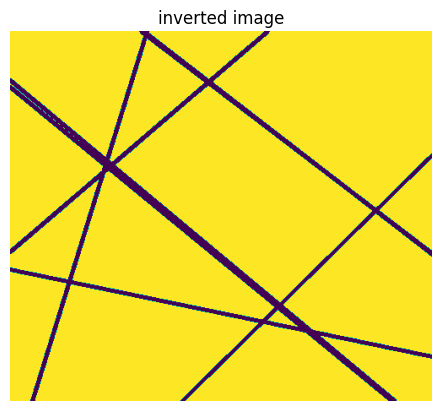

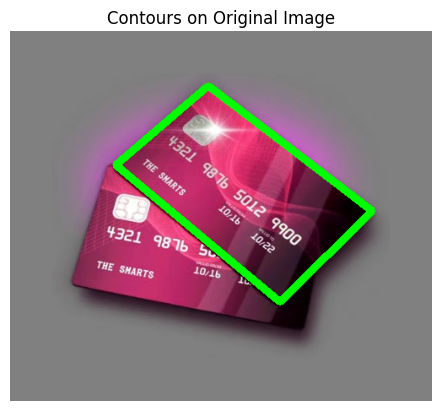

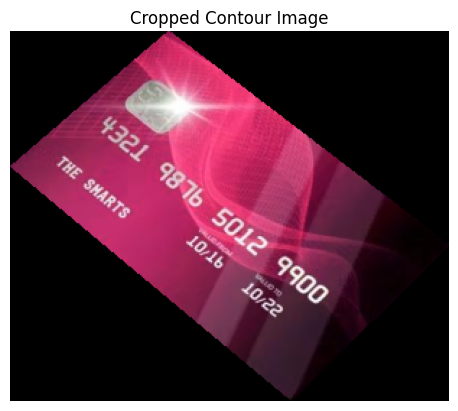

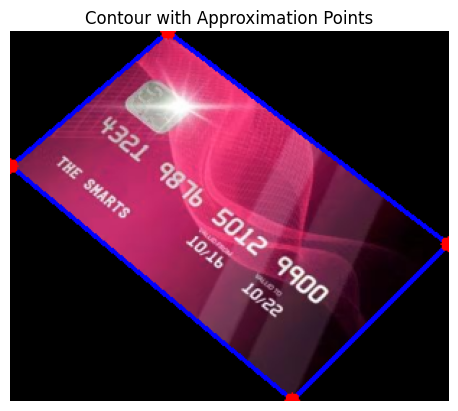

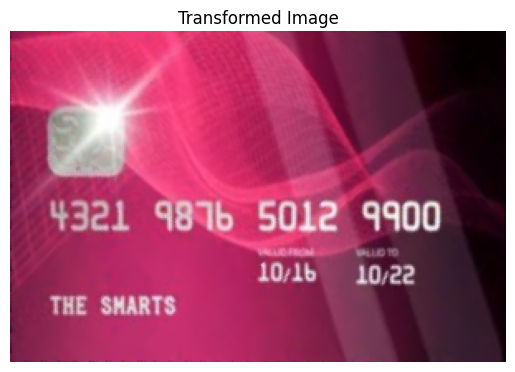

In [51]:
def prepare_image_for_contours(image):

    if len(image.shape) == 3:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image

    if gray_image.dtype != np.uint8:
        gray_image = cv2.convertScaleAbs(gray_image)

    return gray_image



def find_contours(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
    if len(sorted_contours) > 0:
        return sorted_contours[0]
    else:
        print("No contours found.")
        return None

def draw_contours_on_image(contour, image):
    if contour is not None:
        image_with_contours = image.copy()
        cv2.drawContours(image_with_contours, [contour], -1, (0, 255, 0), 7)
        return image_with_contours
    else:
        return image

def crop_contour_from_image(image, contour):
    if contour is not None:
        mask = np.zeros(image.shape[:2], dtype=np.uint8)
        cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
        result = cv2.bitwise_and(image, image, mask=mask)
        x, y, w, h = cv2.boundingRect(contour)
        cropped_contour_image = result[y:y+h, x:x+w]
        return cropped_contour_image, (x, y, w, h)
    else:
        return image, None

def approximate_and_draw_contour(cropped_image, contour, rect):
    if contour is not None:
        epsilon = 0.02 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)
        
        if len(approx) > 0:
            # Adjust approximation points based on the cropping rectangle
            approx = np.array([[pt[0][0] - rect[0], pt[0][1] - rect[1]] for pt in approx])
            
            # Draw the approximated contour on the cropped image
            contour_image = cropped_image.copy()
            cv2.drawContours(contour_image, [approx], -1, (0, 0, 255), 2)  # Red color in BGR
            
            # Draw the points of the approximated contour
            for point in approx:
                cv2.circle(contour_image, tuple(point), 5, (255, 0, 0), -1)  # Blue color in BGR
            
            return contour_image, approx
        else:
            return cropped_image, None
    else:
        return cropped_image, None

def perspective_transform(image, points, dst_size=(300, 200)):
    if len(points) == 4:
        # Ensure points are in the correct order: top-left, top-right, bottom-right, bottom-left
        rect = order_points(points)
        
        # Define the destination points
        width, height = dst_size
        pts2 = np.array([
            [0, 0],
            [width - 1, 0],
            [width - 1, height - 1],
            [0, height - 1]
        ], dtype='float32')

        # Compute the perspective transform matrix
        matrix = cv2.getPerspectiveTransform(rect, pts2)

        # Apply the perspective transform
        transformed_image = cv2.warpPerspective(image, matrix, (width, height))
        return transformed_image
    else:
        print("Not enough points for perspective transformation.")
        return image

def order_points(points):
    # Initialize a list of coordinates that will be ordered as:
    # top-left, top-right, bottom-right, bottom-left
    rect = np.zeros((4, 2), dtype='float32')

    # Sort the points based on their x-coordinates
    x_sorted = points[np.argsort(points[:, 0]), :]

    # Select the left-most and right-most points
    left_most = x_sorted[:2, :]
    right_most = x_sorted[2:, :]

    # Now sort the left-most points based on their y-coordinates to determine the top-left and bottom-left
    left_most = left_most[np.argsort(left_most[:, 1]), :]
    rect[0] = left_most[0]  # top-left
    rect[3] = left_most[1]  # bottom-left

    # Sort the right-most points based on their y-coordinates to determine the top-right and bottom-right
    right_most = right_most[np.argsort(right_most[:, 1]), :]
    rect[1] = right_most[0]  # top-right
    rect[2] = right_most[1]  # bottom-right

    return rect

if lines is not None and len(lines)>=4:
    inverted_imagea = prepare_image_for_contours(cv2.bitwise_not(filtered_line_image))
    showImage("inverted image",inverted_imagea)
    largest_contour = find_contours(inverted_imagea)
else:
    largest_contour = find_contours(dilated_mask)
cropped_contour_image, rect = crop_contour_from_image(padded_imagehq, largest_contour)
contour_with_approx, approx_points = approximate_and_draw_contour(cropped_contour_image, largest_contour, rect)

if approx_points is not None and len(approx_points) >= 4:
    # Ensure we have 4 points for perspective transformation
    pts = np.array(approx_points[:4], dtype='float32')
    transformed_image = perspective_transform(cropped_contour_image, pts)

    # Display results
    showImage("Contours on Original Image", draw_contours_on_image(largest_contour, padded_imagehq))
    showImage("Cropped Contour Image", cropped_contour_image)
    showImage("Contour with Approximation Points", contour_with_approx)
    showImage("Transformed Image", transformed_image)
else:
    print("Insufficient points for perspective transformation.")

## Image Enhancement and Contour Extraction

This section demonstrates how to enhance an image for better contour detection and extract the widest contour.

**Key steps:**

* **Check and darken image:** If the image is too bright, darken it.
* **Calculate gradient:** close in between digits gaps using a morphological gradient.
* **Close gaps:** Fill small holes between numbers parts using morphological closing.
* **Threshold:** Convert the image to binary.
* **Find contours:** Detect external contours.
* **Extract widest contour:** Identify the contour with the maximum width as it would be the pan.
* **Visualize:** Draw a bounding rectangle and crop the pan.

**References:**

* **Morphological Operations:** [https://www.mdpi.com/2227-7390/9/16/1854](https://www.mdpi.com/2227-7390/9/16/1854)
* **Contour Extraction:** [https://subscription.packtpub.com/book/data/9781789344912/10/ch10lvl1sec91/more-functionality-related-to-contours](https://subscription.packtpub.com/book/data/9781789344912/10/ch10lvl1sec91/more-functionality-related-to-contours)

Average Brightness: 75.8819
Image is not very light.


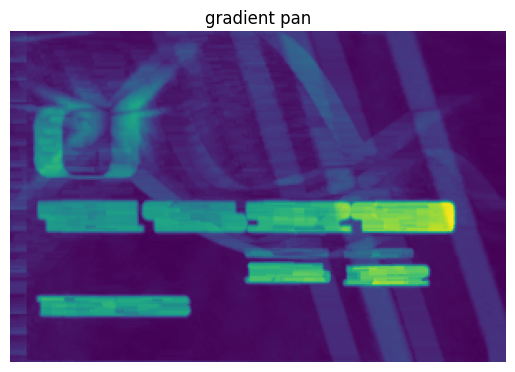

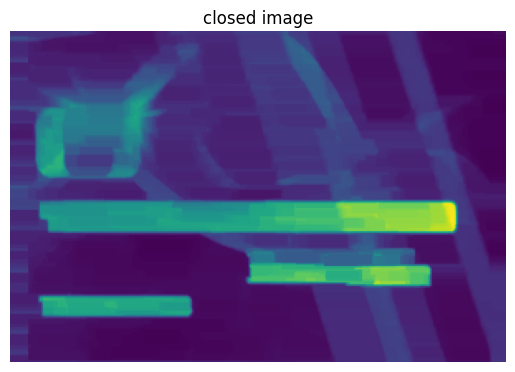

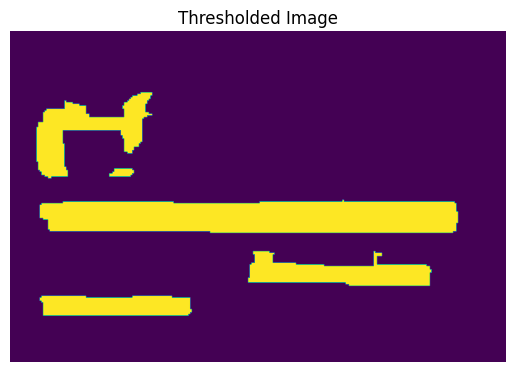

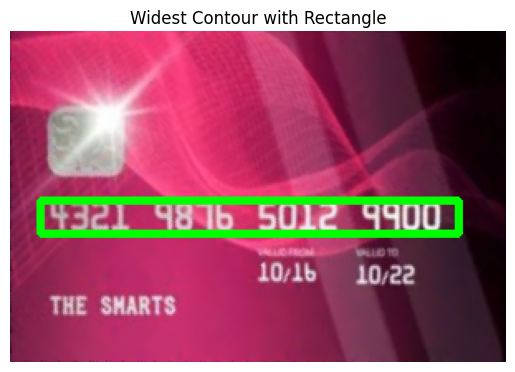

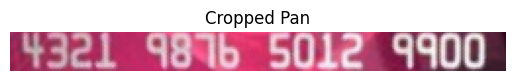

In [52]:
if len(transformed_image.shape)==3:
    gray_image = cv2.cvtColor(transformed_image, cv2.COLOR_BGR2GRAY)
else:
    gray_image = transformed_image
def check_and_darkened_image(image, threshold=200, darken_factor=2):


    # Calculate average brightness
    average_brightness = np.mean(image)
    print(f'Average Brightness: {average_brightness}')

    # Check if the image is very light
    if average_brightness > threshold:
        print('Image is very light. Darkening it.')
        # Darken the image
        darkened_image = np.clip(image * darken_factor, 0, 255).astype(np.uint8)
        showImage('Darkened Image', darkened_image)
        return darkened_image
    else:
        print('Image is not very light.')
        return image


gray_image = check_and_darkened_image(gray_image)


kernel = np.ones((2, 18), np.uint8) 
gradient = cv2.morphologyEx(gray_image, cv2.MORPH_GRADIENT, kernel)
showImage("gradient pan",gradient)
kernelmorph = np.ones((5, 20), np.uint8)

# Perform the morphological close operation
closed_image = cv2.morphologyEx(gradient, cv2.MORPH_CLOSE, kernelmorph)
showImage("closed image",closed_image)
_, thresholded_image = cv2.threshold(closed_image, 95, 255, cv2.THRESH_BINARY)
showImage('Thresholded Image', thresholded_image)
thresholded_image = cv2.convertScaleAbs(thresholded_image)
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize variables to store the widest contour
max_width = 0
widest_contour = None
imagepan = transformed_image.copy()
# Loop through each contour
for contour in contours:
    # Get the bounding rectangle for the contour
    x, y, width, height = cv2.boundingRect(contour)
    
    # Check if this is the widest contour
    if width > max_width:
        max_width = width
        widest_contour = contour
        x_widest, y_widest, w_widest, h_widest = x, y, width, height

# Draw the bounding rectangle around the widest contour on the image
if widest_contour is not None:
    cv2.rectangle(imagepan, (x_widest, y_widest), (x_widest + w_widest, y_widest + h_widest), (0, 255, 0), 3)

    # Crop the widest contour area from the image
    cropped_image = transformed_image[y_widest:y_widest + h_widest, x_widest:x_widest + w_widest]
    showImage('Widest Contour with Rectangle', imagepan)
    showImage('Cropped Pan', cropped_image)


resizedpan=resize_image(cropped_image,900)





## Image Preprocessing and Contour Extraction

This section demonstrates how to preprocess the pan to get the perfect pan with no additional objects rather than the numbers.

**Key steps:**

* **Height adjustment:** If the image is too tall, crop it to a fixed height.
* **Calculate gradient:** Highlight edges using a morphological gradient.

**References:**

* **Morphological Operations:** [https://www.mdpi.com/2227-7390/9/16/1854](https://www.mdpi.com/2227-7390/9/16/1854)

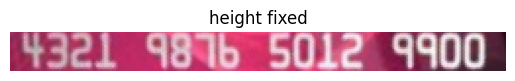

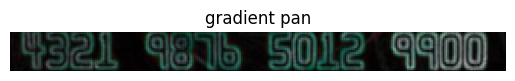

In [53]:
if resizedpan.shape[0]>150:
    resizedpan = resizedpan[:70, :]  


showImage("height fixed" ,resizedpan)

kernelpan = np.ones((5, 6), np.uint8)
gradientpan = cv2.morphologyEx(resizedpan, cv2.MORPH_GRADIENT, kernelpan)
showImage("gradient pan",gradientpan)






## Image Preprocessing and Credit Card Number Extraction

This section demonstrates how to extract credit card numbers using template matching, and make sure to be the most correct numbers by checking it as the digits part gives us the same numbers in different thresholds then the numbers are mostly correct.

**Key steps:**

* **Extract contours form the reference image:** Find contours in the image to get the digit and its shape.
* **Filter contours:** Remove small and wide contours.
* **Match contours:** Compare contours with reference digit images.
* **Detect credit card number:** Iterate through thresholds and find the most consistent number.

**References:**

* **Template Matching:** [Template matching](https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html)

Detected Credit Card Number: 4321987650129900


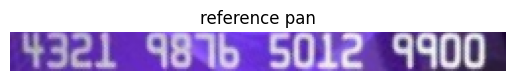

In [54]:

from imutils import contours

def compare_white_black(img):
    white_count = cv2.countNonZero(img)
    black_count = img.size - white_count  # Count of black pixels (0)
    return white_count > black_count

ref = cv2.imread('Credit-Card0.png')
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY)
ref = cv2.threshold(ref, 10, 255, cv2.THRESH_BINARY_INV)[1]

# Find contours in the reference image
refCnts = cv2.findContours(ref.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
refCnts = imutils.grab_contours(refCnts)
refCnts = contours.sort_contours(refCnts, method="left-to-right")[0]
digits = {}

# Store each digit's region of interest (ROI)
for (i, c) in enumerate(refCnts):
    (x, y, w, h) = cv2.boundingRect(c)
    roi = ref[y:y + h, x:x + w]
    roi = cv2.resize(roi, (57, 88))
    digits[i] = roi

def process_image(image, threshold_value):
    if len(image.shape)==3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray=image
    group = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY_INV)[1]
    
    if compare_white_black(group):
        group = cv2.bitwise_not(group)
    
    filtered_image =cv2.medianBlur(cv2.convertScaleAbs(group), 5)

    kernel = np.ones((5, 5), np.uint8)
    eroded = cv2.erode(group, kernel, iterations=1)
    dilated = cv2.dilate(eroded, kernel, iterations=1)

    (h, w) = group.shape[:2]
    part_width = w // 4
    part_outputs = []

    for i in range(4):
        start_x = i * part_width
        end_x = (i + 1) * part_width
        roi = filtered_image[:, start_x:end_x]
        
        # Find contours in the current part
        digitCnts = cv2.findContours(roi.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        digitCnts = imutils.grab_contours(digitCnts)

        # Filter out very small contours
        min_contour_area = 200
        max_contour_width = 70
        min_contour_length = 20
        filteredCnts = [c for c in digitCnts if cv2.contourArea(c) > min_contour_area and cv2.boundingRect(c)[2] < max_contour_width and cv2.boundingRect(c)[3] > min_contour_length]

        # Show contours for each part
        part_contours_image = roi.copy()
        cv2.drawContours(part_contours_image, filteredCnts, -1, (0, 255, 0), 2)
        
        if filteredCnts:
            filteredCnts = contours.sort_contours(filteredCnts, method="left-to-right")[0]
        else:
            part_outputs.append([])
            continue

        part_output = []

        for c in filteredCnts:
            (x, y, w, h) = cv2.boundingRect(c)
            digit_roi = roi[y:y + h, x:x + w]
            digit_roi = cv2.resize(digit_roi, (57, 88))
            scores = []

            for (digit, digitROI) in digits.items():
                result = cv2.matchTemplate(digit_roi, digitROI, cv2.TM_CCOEFF)
                (_, score, _, _) = cv2.minMaxLoc(result)
                scores.append(score)

            part_output.append(str(np.argmax(scores)))
        
        part_outputs.append(part_output)

    return group, part_outputs

# Load the input image
image = resizedpan

# Store detected numbers for comparison
detected_numbers = {i: [] for i in range(4)}

for threshold in range(55, 255):  # Adjust the threshold range as needed
    thresholded_image, part_outputs = process_image(cv2.convertScaleAbs(image.copy()), threshold)
    
    # Show the thresholded image
    # showImage(f"Threshold {threshold}", thresholded_image, cmap="gray")

    for i in range(4):
        if len(part_outputs[i]) == 4:
            detected_numbers[i].append(''.join(part_outputs[i]))
        
    
    # Check if all parts have been detected 7 times
    if all(len(detected_numbers[i]) >= 7 for i in range(4)):
        full_number = ''.join([detected_numbers[i][-1] for i in range(4)])
        print(f"Detected Credit Card Number: {full_number}")
        showImage("reference pan", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        break
else:
    print("No valid credit card number detected within the threshold range, detecting from gradient pan")
    image = gradientpan

    # Store detected numbers for comparison
    detected_numbers = {i: [] for i in range(4)}

    for threshold in range(0, 255):  # Adjust the threshold range as needed
        thresholded_image, part_outputs = process_image(image.copy(), threshold)
        
        # Show the thresholded image
        # showImage(f"Threshold {threshold}", thresholded_image, cmap="gray")

        for i in range(4):
            if len(part_outputs[i]) == 4:
                detected_numbers[i].append(''.join(part_outputs[i]))
            
         
        
        # Check if all parts have been detected 2 times
        if all(len(detected_numbers[i]) >= 2 for i in range(4)):
            full_number = ''.join([detected_numbers[i][-1] for i in range(4)])
            print(f"Detected Credit Card Number: {full_number}")
            showImage("reference pan", cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            break


### **Working test cases:**
<center><img src="./assets/3.png" alt="Gemini Generated Image" width="1200" height=350"/></center>

![T1](./test%20cases%20ocr/t1.jpg)
![T2](./test%20cases%20ocr/t2.jpg)
![T3](./test%20cases%20ocr/t3.jpg)
![T4](./test%20cases%20ocr/t4.jpg)
![T5](./test%20cases%20ocr/t5.jpg)
![T6](./test%20cases%20ocr/t6.jpg)
![T7](./test%20cases%20ocr/t7.jpg)
![T8](./test%20cases%20ocr/t8.jpg)
![T9](./test%20cases%20ocr/t9.jpg)
![T11](./test%20cases%20ocr/t11.jpg)
![T13](./test%20cases%20ocr/t13.jpg)
![T16](./test%20cases%20ocr/t16.jpg)